# 线性回归

符号约定
+ 数据集/训练集: $\boldsymbol D$；
+ 输入/属性: $\boldsymbol x$；
+ 输出/标记: $\boldsymbol y$；
+ 第i个样本的输入/属性: $x^{(i)}$；
+ 第i个样本的输出/标记: $y^{(i)}$；
+ 样本数量：$m$；
+ 第i个样本的损失函数: $L^{(i)}$；
+ 代价函数: $J$；

## 线性回归用于预测

&emsp;&emsp;线性回归主要用于预测。举个栗子：
> 某地区2007年至2013年农村居民家庭纯收入y（单位：千元）的数据如下表：  

> 年份 $x$| 2007 | 2008 | 2009 | 2010 | 2011 | 2012 | 2013 |  
> -|-|-|-|-|-|-|-  
> **人均纯收入 $y$** | **2.9** | **3.3** | **3.6** | **4.4** | **4.8** | **5.2** | **5.9**

> <center><font color=gray>数据集1</font></center>

> 问：该地区2015年农村居民家庭纯收入是多少？  

&emsp;&emsp;在这个任务中，我们要预测的是某个不在数据集的年份的收入。

## 使用线性回归的前提

&emsp;&emsp;使用线性回归的基本的条件是  
+ （1）样本基本是线性的。简单来说，如果把样本放到一个坐标系上，每一个样本是一个点，那么大多数点应该基本在一条直线上，或靠近这条直线，只有少数或没有样本远离这条直线。
+ （2）通常，当不存在一条直线能穿过全部点的时候，我们才用线性回归，否则可以直接用初中学过的通过求斜率和截距的方法得到这条直线。

【例1】判断数据集1能否用线性回归模型预测某年份农村居民纯收入。  
证：  
&emsp;&emsp;可视化数据：

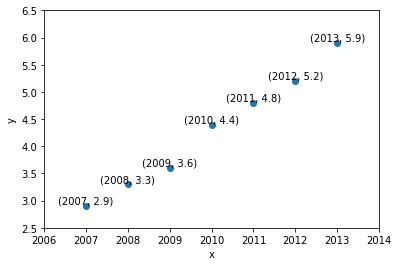

In [1]:
import matplotlib.pyplot as plt

x = [2007, 2008, 2009, 2010, 2011, 2012, 2013]
y = [2.9, 3.3, 3.6, 4.4, 4.8, 5.2, 5.9]

plt.scatter(x, y)
plt.axis([2006, 2014, 2.5, 6.5])

plt.xlabel("x")
plt.ylabel("y")
plt.show()

![png](figure_1.png)
<center><font color=gray>图1</font></center>

&emsp;&emsp;把这些点全连起来得到：

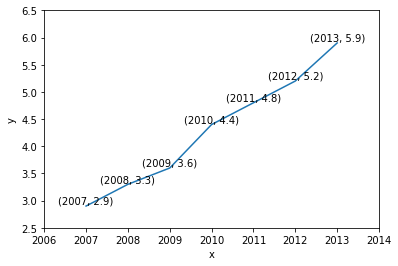

In [13]:
plt.plot(x, y)
plt.axis([2006, 2014, 2.5, 6.5])
for i, j in zip(x, y):  
    plt.text(i, j, (i,j), ha='center', va='bottom', fontsize=10)  
plt.xlabel("x")
plt.ylabel("y")
plt.show()

![png](figure_2.png)  
<center><font color=gray>图2</font></center>

&emsp;&emsp;图像中每一个点代表特定年份对应的收入。这些点（1）大概落在一条直线附近，但（2）不存在一条直线能穿过全部点，因此可以使用线性回归预测某个不在数据集中的年份的纯收入。

## 我们要找一条直线 | 线性回归的模型

&emsp;&emsp;数据集1上的样本都落在某一条直线附近。我们可以推测，数据集1没有的年份的收入对应的点也在这条直线附近。也就是说，已知和未知的数据都分布在这条直线上。这条直线可能是下图的蓝色线；而对于某一个数据集1上没有的年份的收入，比如2006年的收入，可能是下图的红色小点点：

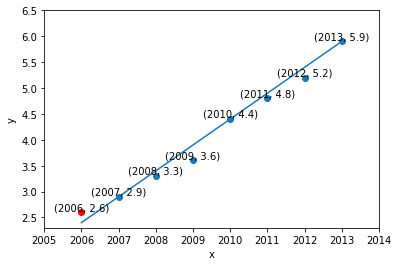

In [14]:
plt.scatter(x, y)
plt.axis([2005, 2014, 2.3, 6.5])
for i, j in zip(x, y):  
    plt.text(i, j, (i,j), ha='center', va='bottom', fontsize=10) 
plt.scatter(2006, 2.6, c="r")
plt.text(2006, 2.6, (2006, 2.6), ha="center", va="bottom", fontsize=10)
plt.plot([2006, 2013], [2.4, 5.9])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

![png](figure_3.png)  
<center><font color=gray>图3</font></center>

&emsp;&emsp;现在，我们要做的就是**找出一条直线，使每一个样本（在坐标系上用点表示）都尽可能地分布在这条直线附近，即让这条直线很好地拟合数据。  
&emsp;&emsp;因为我们推测已知数据和未知数据都分布在一条直线附近，因此给定一个不在数据集上的输入，（对数据集1而言就是2007-2013年之外的年份，如2006年），我们可以通过找出这个输入在直线上对应的位置得到一个输出（我们预测的这个年份的收入），并把这个输出近似地当作是真实值。  
&emsp;&emsp;也因为我们推测已知数据和未知数据都分布在一条直线附近，我们可以利用已知的数据（对数据集1来说，就是2007年-2013年及其对应收入）找出这条直线，用来预测其他年份的值**  

&emsp;&emsp;老师告诉我们，直线可以用
$$y = k \cdot x + b \tag{1}$$
表示出来。其中，
+ x：输入；
+ y：输出；
+ k：斜率；
+ b：截距。

&emsp;&emsp;现在我们把符号换一下，变成：
$$\hat y^{(i)} = \theta_1 \cdot x^{i)} + \theta_0 \tag{2}$$
&emsp;&emsp;其中
+ $x^{(i)}$：第i个输入，如数据集1中$x^{(1)} = 2007$，$x^{(2)} = 2008$；
+ $\hat y^{(i)}$：第i个输出，如数据集1中$y^{(1)}=2.9$，$y^{(2)}=3.3$；
+ $\theta_1$：权重,也就是公式(1)的k换个名字；
+ $\theta_0$：偏差,也就是公式(1)的b换个名字。  

&emsp;&emsp;公式(2)就是线性回归的模型。

## 把这条直线确定下来。

&emsp;&emsp;现在，我们还不知道哪条直线最好地穿过所有已知的样本，那就随便找一条呗～随便让$\theta_1$，$\theta_2$取个值，比如$\theta_1 = 0.49999$，$\theta_0 = -1003.3$。画出这条直线如图：

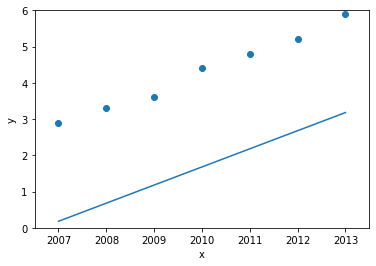

In [4]:
def f1(x):
    return x * 0.49999 - 1003.3 

plt.scatter(x, y)
plt.plot([2007, 2013], [f1(2007), f1(2013)])
plt.axis([2006.5, 2013.5, -100, 25])
plt.axis([2006.5, 2013.5, 0, 6])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

![png](figure_4.png)  
<center><font color=gray>图4</font></center>

&emsp;&emsp;umm...相差有点大。那就试试$\theta_1 = 0.5$，$\theta_0 = -1001.6$

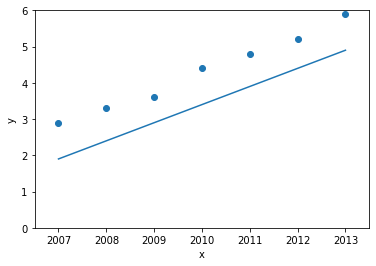

In [16]:
def f2(x):
    return x * 0.5 - 1001.6

plt.scatter(x, y)
plt.plot([2007, 2013], [f2(2007), f2(2013)])
plt.axis([2006.5, 2013.5, -100, 25])
plt.axis([2006.5, 2013.5, 0, 6])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

![png](figure_5.png)  
<center><font color=gray>图5</font></center>

&emsp;&emsp;这条看起来好多了OwO。我们可以继续改变$\theta_1$，$\theta_2$的值，直到找到一条尽可能穿过全部已知样本点的直线。但这不是个好办法。我们目前正在做的只是人工智能的前一半，也就是人工（doge。$\theta_1$，$\theta_2$的取值都有很多很多很多种可能，要一个个尝试是不现实的，我们要想办法让机器找出来。

&emsp;&emsp;我们要机器找什么？找的是一条拟合得好的直线。机器怎么知道哪条直线拟合地好？那首先要问，我们是怎么判断哪条直线比较好哪条直线比较差的？

&emsp;&emsp;实际上，我们是通过已知样本（也就是图上的一个个小点点）和直线上相同输入(相同横坐标)对应的点之间的距离判断的。图4的每个小点点和直线上相同输入对应的点之间的距离很大，所以我们判断图4的直线不好；而图5的小点点和直线上相同输入的点的距离比较小，所以我们觉得图5直线比较好。因此,我们是通过真实值(每一个点)和预测值(相同输入下对应直线上的点)之间的距离判断的.

&emsp;&emsp;在图4，图5每个小点点和直线之间作垂线我们得到下图：

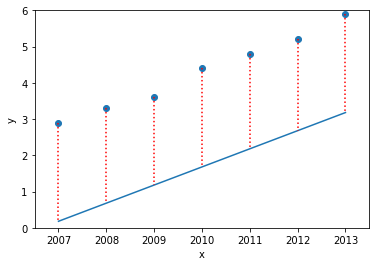

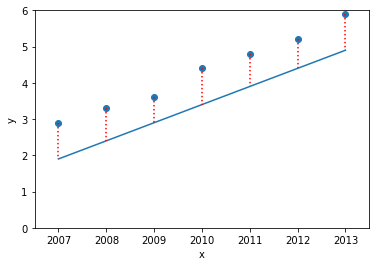

In [17]:
plt.scatter(x, y)
plt.plot([2007, 2013], [f1(2007), f1(2013)])
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], f1(x[i])], linestyle=':', c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.axis([2006.5, 2013.5, 0, 6])
plt.show()

plt.scatter(x, y)
plt.plot([2007, 2013], [f2(2007), f2(2013)])
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], f2(x[i])], linestyle=':', c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.axis([2006.5, 2013.5, 0, 6])
plt.show()

![png](figure_6.png)  
<center><font color=gray>图6</font></center>  

![png](figure_7.png)  
<center><font color=gray>图7</font></center>

&emsp;&emsp;很明显，图6（对应图4）的红线长度和比图7（对应图5）的红线长度和大，所以我们判断图5的直线更好。

【例2】现有直线 $l1: 0.4999999 \cdot x - 1001.8$ 和直线 $l2: 0.50001 \cdot x - 1003.482$ 用于拟合数据集1的数据，判断哪条直线拟合能力好。

解：  
&emsp;&emsp;可视化如下：

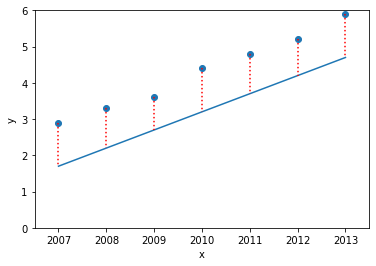

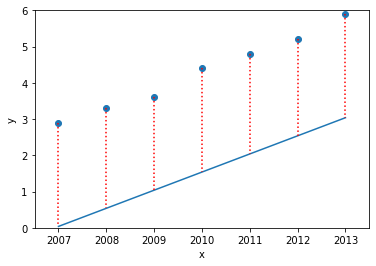

In [18]:
def f3(x):
    return 0.4999999 * x - 1001.8

def f4(x):
    return 0.50001 * x - 1003.482

plt.scatter(x, y)
plt.plot([2007, 2013], [f3(2007), f3(2013)])
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], f3(x[i])], linestyle=':', c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.axis([2006.5, 2013.5, 0, 6])
plt.show()

plt.scatter(x, y)
plt.plot([2007, 2013], [f4(2007), f4(2013)])
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], f4(x[i])], linestyle=':', c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.axis([2006.5, 2013.5, 0, 6])
plt.show()

![png](figure_8.png)  
<center><font color=gray>图8</font></center>  

![png](figure_9.png)  
<center><font color=gray>图9</font></center>

&emsp;&emsp;由于数据点到直线$l1$对应点的距离比$l2$小，所以$l1$拟合能力更好。

&emsp;&emsp;为什么我们用的是垂线而不是每个小点点到直线的几何距离（也就是用$\frac{|a \cdot x + b \cdot y + c|}{\sqrt {a^2 + b^2}}$算出的距离）？因为我们判断的是对于同一个输入（如2007）的预测值（如图8直线对2007的预测值是1.69，图上未标出）和实际值（如数据集1中2007对应的值2.9）的差距。输入相同，即横坐标相同；而预测值和实际值是同一个横坐标对应的两个纵坐标的值。

### 告诉计算机判断的方法 | 损失函数 代价函数

&emsp;&emsp;因此，我们的判断依据是同一个输入$x^{(i)}$的预测值$\hat y^{(i)}$和实际值$y^{(i)}$的距离，也就是
$$|\hat y^{(i)} - y^{(i)}| \tag{3}$$
&emsp;&emsp;我们把这个距离当作样本点$i$的损失函数，即：
$$L^{(i)} = |\hat y^{(i)} - y^{(i)}| \tag{4}$$

&emsp;&emsp;p了个s：这里的损失函数和常规操作不太一样，之后会变成常规操作的形式。  

&emsp;&emsp;我们希望样本点$i$对应的距离是最小的，即：  
$$\min (L^{(i)}) \tag{5}$$
&emsp;&emsp;我们希望样本点$i$对应的距离是最小的，也就是希望样本点1，样本点2，……样本点$m$（数据集1有7个数据，所以对于数据集1，$m=7$）的距离是最小的，也就是希望每一个样本点的距离是最小的，即：
$$
\begin{align}
&\sum^m_{i=1} \min (L^{(i)}） \tag{6.1} \\
=& \min (\sum^m_{i=1} L^{(i)}) \tag{6.2}
\end{align}
$$
&emsp;&emsp;其中，$\sum^m_{i=1} L^{(i)}$是每个样本的损失函数的和，即代价函数$J$。因此：
$$J = \sum^m_{i=1} L^{(i)} \tag{7}$$
&emsp;&emsp;由公式(2)和公式(4)，公式(7)可以改写为：
$$
J = \sum^m_{i=1} |\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)}| \tag{8}
$$  

&emsp;&emsp;p了个s：这里的代价函数和常规操作不太一样，之后会变成常规操作的形式。  

&emsp;&emsp;我们要最小化代价函数，即公式(6.2)：
$$
\min(J) = \min(\sum^m_{i=1} |\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)}| \tag{9})
$$
&emsp;&emsp;这就是计算机判断直线优劣的方法啦～代价函数越小，证明每个样本点距离直线上对应点的距离越小，预测值和实际值相差越小，直线拟合越好，否则越差。

【例3】计算直线 $l1: 0.4999999 \cdot x - 1001.8$ 对于数据集1的代价函数$J$。  
解：  
&emsp;&emsp;数据集1有7个样本，所以$m = 7$。
$$
\begin{align}
J &= \sum^7_{i=1} |\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)}| \tag{10.1} \\
&= |\theta_1 \cdot x^{(1)} + \theta_0 - y^{(1)}| + |\theta_1 \cdot x^{(2)} + \theta_0 - y^{(2)}| + \cdots + |\theta_1 \cdot x^{(7)} + \theta_0 - y^{(7)}| \tag{10.2} \\
&= |0.4999999 \cdot 2007 + 1001.8 - 2.9| + |0.4999999 \cdot 2008 + 1001.8 - 3.3| + \cdots + |0.4999999 \cdot 2013 + 1001.8 - 5.9| \tag{10.3} \\
&= 7.701406999999768
\end{align}
$$

### 找出最小值时的$\theta_1$和$\theta_0$ | 优化

#### $|x|$和$x^2$

&emsp;&emsp;我们希望代价函数越小越好，最理想的情况就是找到代价函数的最小值。要是你问一个高中生怎么求最值，他大概会毫不犹豫地说：导数为0！  
&emsp;&emsp;但是高数老师说，不是所有最值都可以通过求导获得，比如下面这个函数|x|在$x = 0$处就是不可导的

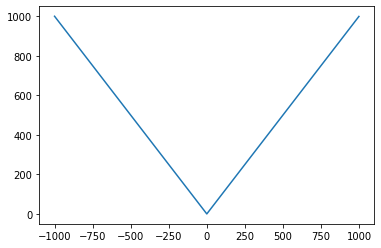

In [8]:
import math
plt.plot([x for x in range(-1_000, 1_000)], [abs(x) for x in range(-1_000, 1_000)])
plt.show()

![png](figure_10.png)  
<center><font color=gray>图10</font></center>

&emsp;&emsp;然鹅，$|x|$的最小值就是$x = 0$的时候OwO。这可咋办quq

&emsp;&emsp;试试把|x|平方：
$${|x|}^2 = x^2 \tag{11}$$

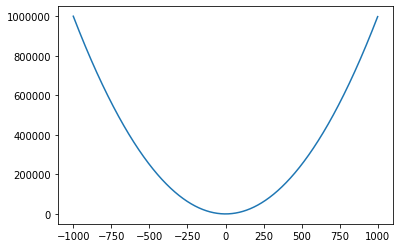

In [9]:
plt.plot([x for x in range(-1_000, 1_000)], [x ** 2 for x in range(-1_000, 1_000)])
plt.show()

![png](figure_11.png)  
<center><font color=gray>图11</font></center>

&emsp;&emsp;求导为0得：
$$
\begin{align}
2 \cdot x \tag{12.1} &= 0 \\
x &= 0 \tag{12.2}
\end{align}
$$
&emsp;&emsp;因此$x = 0$有极值。  
&emsp;&emsp;因为$x^2$在$x \in R$只有一个极小值点，所以这个极小值点就是最小值点。

&emsp;&emsp;这里能看出|x|和$x^2$的最小值点是一样的。可以证明，这是正确的。用的其实就是高中导数大题的方法啦～

【例4】证明|x|和x^2最小值点相同。  
证：  
> 函数 | $|x|$ | $x^2$ 
> -|:-:|:-:
> **导数** | **$$ \left\{
\begin{aligned}
-1 & \ \ (x < 0) \\
1  & \ \ (x > 0) \\
\end{aligned}
\right.
$$** | **$2x$** |
> **单调性** | x > 0: 递增；x < 0：递减 | x > 0: 递增；x < 0：递减 |

<center><font color=gray>表1</font></center>

&emsp;&emsp;因此，两个函数的单调性一样，所以极值点相同。  
&emsp;&emsp;考虑$x^2$：
> 导数值 | x < 0 | x = 0 | x > 0
> -|-|-|-
> 纵坐标变化|递减|极小值|递增

<center><font color=gray>表2</font></center>

&emsp;&emsp;只有一个极小值点，且$x^2$在$x \in R$连续，所以这个极小值点就是最小值点。  
&emsp;&emsp;所以$|x|$和$x^2$最小值点相同。

&emsp;&emsp;需要注意的是，我们只需要两个函数的最小值点相同，而不是最小值相同。之后说明原因。

#### 换一个形式 | 损失函数 代价函数

&emsp;&emsp;我们的损失函数公式(4)，代价函数公式(8)也有绝对值。根据上面的讨论，为了避免求导的限制，我们也平方一下～

$$L^{(i)} = (\hat y^{(i)} - y^{(i)})^2 \tag{13}$$  
$$J = \sum^m_{i=1} (\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)})^2 \tag{14}$$

&emsp;&emsp;这就是线性回归使用的损失函数和代价函数！

【例5】计算直线 $l1: 0.4999999 \cdot x - 1001.8$ 对于数据集1的代价函数$J$。  
解：  
&emsp;&emsp;数据集1有7个样本，所以$m = 7$。
$$
\begin{align}
J &= \sum^7_{i=1} (\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)})^2 \tag{15.1} \\
&= (\theta_1 \cdot x^{(1)} + \theta_0 - y^{(1)})^2 + (\theta_1 \cdot x^{(2)} + \theta_0 - y^{(2)})^2 + \cdots + (\theta_1 \cdot x^{(7)} + \theta_0 - y^{(7)})^2 \tag{15.2} \\
&= (0.4999999 \cdot 2007 + 1001.8 - 2.9)^2 + (0.4999999 \cdot 2008 + 1001.8 - 3.3)^2 + \cdots + (0.4999999 \cdot 2013 + 1001.8 - 5.9)^2 \tag{15.3} \\
&= 8.553095682806793
\end{align}
$$

&emsp;&emsp;需要注意的是，$|x|$和$x^2$对同一条直线的代价函数值是不一样的。但是对同一个回归任务，我们不会混合使用两种代价函数，所以代价函数值不一样也问题不大。  
&emsp;&emsp;同样，对拟合最好的直线，两个函数能算出各自的代价函数。因拟合最好，两个代价函数都是最小值，但这两个代价函数的最小值也是不相等的。

#### 求导！

&emsp;&emsp;再明确以下我们的任务：找出拟合能力最好的直线。
+ q:什么直线拟合能力最好？
+ a:代价函数最小的直线。
+ q:怎么确定一条直线？
+ a:需要$\theta_1$和$\theta_0$

&emsp;&emsp;所以我们的现在的任务就是求出代价函数最小时的$\theta_1$和$\theta_0$。把最佳直线的两个参数写成$\theta_1^*$，$\theta_0^*$。所以我们的任务可以写成：
$$
(\theta_1^*, \theta_0^*) = \min \limits_{w, b} J \tag{16}
$$

&emsp;&emsp;然后分别让$\theta_1$和$\theta_0$导数为0就能得到$\theta_1^*$和$\theta_0^*$，进而得到最佳直线。

【例6】计算$\theta_1^*$和$\theta_0^*$
解：  
$$
\begin{align}
    \frac{\partial J}{\partial \theta_0} &= 0 \\
    \frac{\partial \sum^m_{i=1}(\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)})^2}{\partial \theta_0} &= 0 \\
    \sum^m_{i=1}2(\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)}) &= 0 \\
    2\sum^m_{i=1}(\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)}) &= 0 \\
    \sum^m_{i=1}(\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)}) &= 0 \\
    \sum^m_{i=1}(\theta_1 \cdot x^{(i)}) + \sum^m_{i=1}\theta_0 - \sum^m_{i=1}y^{(i)} &= 0 \\
    \sum^m_{i=1}\theta_0 &= \sum^m_{i=1}y^{(i)} -\sum^m_{i=1}(\theta_1 \cdot x^{(i)}) \\
    m\theta_0 &= \sum^m_{i=1}y^{(i)} - \sum^m_{i=1}(\theta_1 \cdot x^{(i)}) \\
    m\theta_0 &= \sum^m_{i=1}(y^{(i)} - \theta_1 \cdot x^{(i)}) \\
    \theta_0 &= \frac{1}{m}\sum^m_{i=1}(y^{(i)} - \theta_1 \cdot x^{(i)}) \\
    \\
    因此 \ \ \theta_0^* &= \frac{1}{m}\sum^m_{i=1}(y^{(i)} - \theta_1 \cdot x^{(i)})
\end{align}
$$
<br/>
<br/>
<br/>
$$
\begin{align}
    \frac{\partial J}{\partial \theta_1} &= 0 \\
    \frac{\partial \sum^m_{i=1}(\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)})^2}{\partial \theta_1} &= 0 \\
    \sum^m_{i=1}2(\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)})x^{(i)} &= 0 \\
    2\sum^m_{i=1}(\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)})x^{(i)} &= 0 \\
    \sum^m_{i=1}(\theta_1 \cdot x^{(i)} + \theta_0 - y^{(i)})x^{(i)} &= 0 \\
    \sum^m_{i=1}(\theta_1 {x^{(i)}}^2 + \theta_0 x^{(i)} - y^{(i)} x^{(i)}) &= 0 \\
    \sum^m_{i=1}\theta_1 {x^{(i)}}^2 + \sum^m_{i=1}\theta_0 x^{(i)} - \sum^m_{i=1}y^{(i)} x^{(i)} &= 0 \\
    \sum^m_{i=1}\theta_1 {x^{(i)}}^2 + \sum^m_{i=1}\theta_0 x^{(i)} &= \sum^m_{i=1}y^{(i)} x^{(i)} \\
    \sum^m_{i=1}\theta_1 {x^{(i)}}^2 + \sum^m_{i=1}[\frac{1}{m}\sum^m_{j=1}(y^{(j)} - \theta_1 \cdot x^{(j)})] x^{(i)} &= \sum^m_{i=1}y^{(i)} x^{(i)} \\
    \sum^m_{i=1}\theta_1 {x^{(i)}}^2 + \sum^m_{i=1}(\frac{1}{m}\sum^m_{j=1}y^{(j)} - \frac{1}{m}\sum^m_{j=1}\theta_1 \cdot x^{(j)}) x^{(i)} &= \sum^m_{i=1}y^{(i)} x^{(i)} \\
    \sum^m_{i=1}\theta_1 {x^{(i)}}^2 + \sum^m_{i=1}(\bar y - \frac{1}{m}\sum^m_{j=1}\theta_1 \cdot x^{(j)}) x^{(i)} &= \sum^m_{i=1}y^{(i)} x^{(i)} \\
    \sum^m_{i=1}\theta_1 {x^{(i)}}^2 + \sum^m_{i=1}(\bar y - \theta_1 \frac{1}{m}\sum^m_{j=1} x^{(j)}) x^{(i)} &= \sum^m_{i=1}y^{(i)} x^{(i)} \\
    \sum^m_{i=1}\theta_1 {x^{(i)}}^2 + \sum^m_{i=1}(\bar y - \theta_1 \bar x) x^{(i)} &= \sum^m_{i=1}y^{(i)} x^{(i)} \\
    \sum^m_{i=1}\theta_1 {x^{(i)}}^2 + \sum^m_{i=1}(\bar y x^{(i)} - \theta_1 \bar x x^{(i)}) &= \sum^m_{i=1}y^{(i)} x^{(i)} \\
    \sum^m_{i=1}\theta_1 {x^{(i)}}^2 + \sum^m_{i=1}\bar y x^{(i)} - \sum^m_{i=1}\theta_1 \bar x x^{(i)} &= \sum^m_{i=1}y^{(i)} x^{(i)} \\
    \sum^m_{i=1}\theta_1 {x^{(i)}}^2 - \sum^m_{i=1}\theta_1 \bar x x^{(i)} &= \sum^m_{i=1}y^{(i)} x^{(i)} - \sum^m_{i=1}\bar y x^{(i)} \\
    \sum^m_{i=1}(\theta_1 {x^{(i)}}^2 - \theta_1 \bar x x^{(i)}) &= \sum^m_{i=1}y^{(i)} x^{(i)} - \sum^m_{i=1}\bar y x^{(i)} \\
    \theta_1 \sum^m_{i=1}({x^{(i)}}^2 - \bar x x^{(i)}) &= \sum^m_{i=1}y^{(i)} x^{(i)} - \sum^m_{i=1}\bar y x^{(i)} \\
    \theta_1 \sum^m_{i=1}({x^{(i)}}^2 - \bar x x^{(i)}) &= \sum^m_{i=1}(y^{(i)} x^{(i)} - \bar y x^{(i)}) \\
    \theta_1 \sum^m_{i=1}{x^{(i)}}(x^{(i)} - \bar x) &= \sum^m_{i=1}(y^{(i)} x^{(i)} - \bar y x^{(i)}) \\
    \theta_1 \sum^m_{i=1}{x^{(i)}}(x^{(i)} - \bar x) &= \sum^m_{i=1}x^{(i)}(y^{(i)} - \bar y) \\
    \theta_1 &= \frac{\sum^m_{i=1}x^{(i)}(y^{(i)} - \bar y) \\}{\sum^m_{i=1}{x^{(i)}}(x^{(i)} - \bar x)} \\
    \\
    因此 \ \ \theta_1^* &= \frac{\sum^m_{i=1}x^{(i)}(y^{(i)} - \bar y) \\}{\sum^m_{i=1}{x^{(i)}}(x^{(i)} - \bar x)}
\end{align}
$$

## 拟合最好的直线

&emsp;&emsp;得到上面$\theta_1$和$\theta_0$的公式之后，可计算得到
$$
\theta_0 = -1000.7000000002939 \\
\theta_1 = 0.5000000000001462
$$
&emsp;&emsp;因此得到的拟合数据集1最好的直线是
$$
\hat y = 0.5000000000001462 \cdot x - 1000.7000000002939
$$

In [10]:
x = [2007, 2008, 2009, 2010, 2011, 2012, 2013]
y = [2.9, 3.3, 3.6, 4.4, 4.8, 5.2, 5.9]

x_avg = sum(x) / len(x)
y_avg = sum(y) / len(y)

optimal_theta_1 = sum([x[i] * (y[i] - y_avg) for i in range(len(x))]) / sum([x[i] * (x[i] - x_avg) for i in range(len(y))])
optimal_theta_1

0.5000000000001462

In [11]:
optimal_theta_0 = (sum([y[i] - optimal_theta_1 * x[i] for i in range(len(x))])) / len(x)
optimal_theta_0

-1000.7000000002939

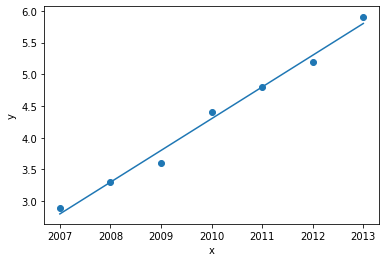

In [22]:
def f_optimal(x):
    return x * 0.5000000000001462 -1000.7000000002939

plt.scatter(x, y)
plt.plot([2007, 2013], [f_optimal(2007), f_optimal(2013)])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 预测

&emsp;&emsp;现在回到我们的问题 

【例7】该地区2015年农村居民家庭纯收入是多少？  
解：
$$\hat y = \theta_1^* \cdot 2015 + \theta_0^* = 6.80000000000075（千元）\tag{17} $$

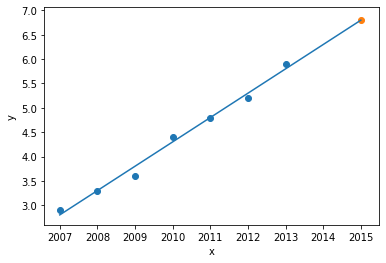

In [28]:
def f_optimal(x):
    return x * 0.5000000000001462 -1000.7000000002939

plt.scatter(x, y)
plt.plot([2007, 2015], [f_optimal(2007), f_optimal(2015)])
plt.scatter(2015, f_optimal(2015))
plt.xlabel("x")
plt.ylabel("y")
plt.show()